In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

In [7]:

# Read the file NepseDataHistorical1997_2024.csv
df1 = pd.read_csv('NepseDataHistorical1997_2024.csv')

# Print the dataframe
print(df1)

        SN      open      high       low     close  change  pct_change  \
0        1  2,046.62  2,046.62  2,013.75  2,017.46  -27.26       -1.33   
1        2  2,027.80  2,078.51  2,027.80  2,078.51   61.05        3.03   
2        3  2,081.98  2,134.62  2,081.98  2,132.96   54.45        2.62   
3        4  2,134.14  2,141.35  2,085.93  2,088.16  -44.80       -2.10   
4        5  2,089.01  2,111.99  2,066.08  2,111.99   23.83        1.14   
...    ...       ...       ...       ...       ...     ...         ...   
6083  6084    172.66    172.66    172.66    172.66    0.00        0.00   
6084  6085    172.68    173.03    173.03    173.03    0.00        0.00   
6085  6086    173.03    173.03    173.03    173.03    0.00        0.00   
6086  6087    173.25    173.25    173.25    173.25    0.00        0.00   
6087  6088    173.26    173.26    173.26    173.26    0.00        0.00   

              turnover        date  
0     1,443,432,770.47  22/07/2022  
1     2,730,937,196.52  24/07/2022  


In [8]:
# Convert 'open', 'high', 'low', 'close', 'turnover' to numeric values
numeric_cols = ['open', 'high', 'low', 'close', 'turnover']
for col in numeric_cols:
    df1[col] = pd.to_numeric(df1[col].str.replace(',', ''), errors='coerce')

# Convert 'date' to datetime
df1['date'] = pd.to_datetime(df1['date'], format='%d/%m/%Y', errors='coerce')

# Drop the 'SN' column if it's just a serial number and not needed
df1.drop('SN', axis=1, inplace=True)

# Display the updated DataFrame
df1.head()

,open,high,low,close,change,pct_change,turnover,date
0,2046.62,2046.62,2013.75,2017.46,-27.26,-1.33,1.443433e+09,2022-07-22
1,2027.80,2078.51,2027.80,2078.51,61.05,3.03,2.730937e+09,2022-07-24
2,2081.98,2134.62,2081.98,2132.96,54.45,2.62,4.106819e+09,2022-07-25
3,2134.14,2141.35,2085.93,2088.16,-44.80,-2.10,3.704998e+09,2022-07-26
4,2089.01,2111.99,2066.08,2111.99,23.83,1.14,3.161455e+09,2022-07-27


C:\Users\hp\AppData\Local\Temp\ipykernel_8236\3741100405.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(data_path, parse_dates=['date'], index_col='date')
C:\Users\hp\gitdemo\AdvancedNEPSE\venv\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


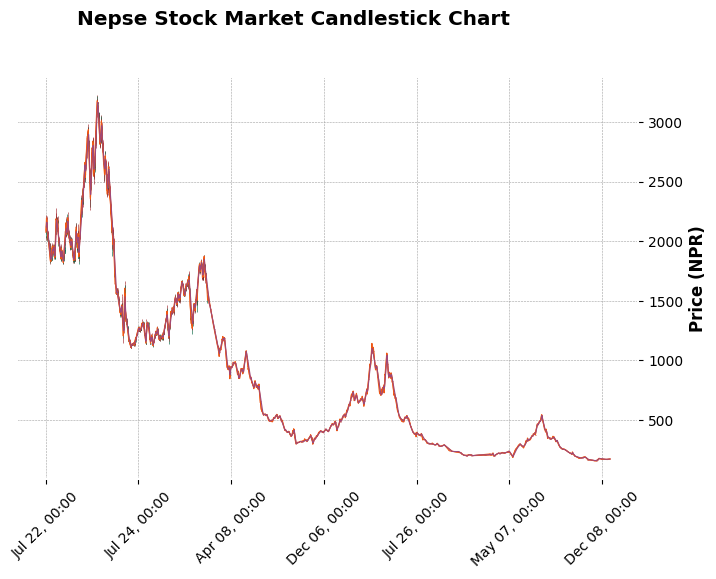

In [12]:


# Load your data
data_path = 'NepseDataHistorical1997_2024.csv'
data = pd.read_csv(data_path, parse_dates=['date'], index_col='date')

# Convert columns to float if they are not already
numeric_cols = ['open', 'high', 'low', 'close']
data[numeric_cols] = data[numeric_cols].replace(',', '', regex=True).astype(float)

# Create a candlestick chart without the volume
mpf.plot(data[['open', 'high', 'low', 'close']], type='candle', style='charles',
         title='Nepse Stock Market Candlestick Chart',
         ylabel='Price (NPR)',
         figratio=(12, 8),
         mav=(3,6,9))  # Moving averages
